<p style="font-size:14px">
Em cenários acadêmicos, o desempenho dos alunos pode ser influenciado por diversos fatores, sendo as horas de estudo uma das mais óbvias. No entanto, o cansaço também pode ser um fator relevante, onde estudar por muitas horas seguidas pode resultar em uma menor eficiência, refletindo em notas mais baixas. Portanto, a proposta aqui é:
</p>

### Proposta 📋

<p style="font-size:14px">
1. Restringir o tempo máximo de estudo a 24 horas;<br>
2. Garantir que a nota final nunca ultrapasse o valor máximo de 100;<br>
3. Considerar se o aluno está "cansado" (0 para não cansado e 1 para cansado), o que impacta negativamente a nota.
</p>

### Observações 📋

<p style="font-size:14px">
1. Horas de Estudo: Um valor entre 0 e 24, onde quanto mais tempo o aluno estuda, maior a nota. No entanto, o efeito do estudo tem limites, e a produtividade começa a cair após um certo número de horas.<br> 
2. Cansado: Um valor binário (0 ou 1), onde "1" indica que o aluno está cansado, resultando em uma redução na nota final. <br>
3. O desempenho final (nota) é calculado com base nas horas de estudo, mas limitado ao valor máximo de 100. <br>
4. Se o aluno está cansado, a nota é reduzida. As notas são geradas com base em uma função linear, multiplicando as horas de estudo por um fator aleatório (para simular variações na eficiência), e se o aluno estiver cansado, subtraímos pontos da nota final.
</p>

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
# Considerando os valores em AULA:

In [161]:
# Gerar Seed:
np.random.seed()
n_samples = 1_000

# gerar Arrays:
horas_estudo = np.random.uniform(0,24,n_samples)
cansado = np.random.choice([0,1], n_samples)
# nota = np.random.choice(range(0,100), n_samples)
nota = np.minimum(horas_estudo * np.random.uniform(3, 5), 100) - (cansado * 10)

In [162]:
pd.Series(nota).sort_values()

588    -9.940287
136    -9.710923
26     -9.693482
18     -9.650797
606    -9.635226
         ...    
437    81.040118
48     81.317424
921    81.526038
384    81.536648
633    81.750193
Length: 1000, dtype: float64

In [163]:
nota = np.clip(nota, 0, 100)

In [164]:
# Garantir os valores corretos
data = pd.DataFrame({
    'Horas de estudo': horas_estudo,
    'Cansado': cansado,
    'Nota':nota
})
data.head()

,Horas de estudo,Cansado,Nota
0,16.546268,0,56.514290
1,8.124361,0,27.749006
2,14.209173,1,38.531871
3,14.564423,0,49.745236
4,9.863370,1,23.688644


In [165]:
hora_de_estudo = data['Horas de estudo'].values
valor_nota = data['Nota'].values

In [166]:
hora_de_estudo[:5]

array([16.54626833,  8.12436113, 14.20917345, 14.56442289,  9.86336976])

In [167]:

valor_nota[:5]

array([56.51429039, 27.74900628, 38.53187066, 49.74523608, 23.68864395])

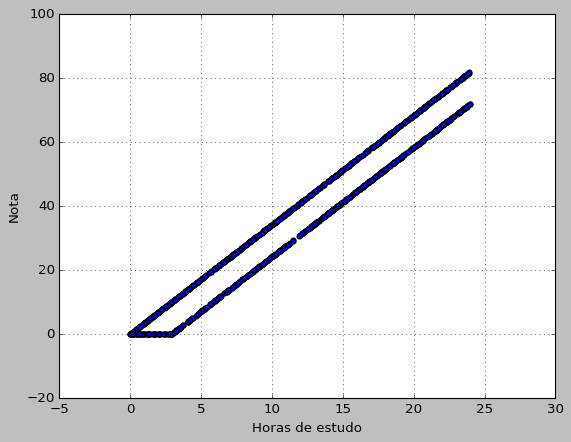

In [168]:
plt.style.use('classic')

# plot
fig, ax = plt.subplots()
ax.scatter(
    x=hora_de_estudo, 
    y=valor_nota
    )

plt.grid()
plt.xlabel('Horas de estudo')
plt.ylabel('Nota')

plt.show()